In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("mobile_addiction_cleaned.csv")
df['addicted'] = df['addicted'].map({'addicted': 1, 'not addicted': 0})
df = df.drop(columns=['Entry number', 'work_study_hours'])
df.head()

,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,stress_level,apps_installed,addicted
0,2,29,0,0,49,0,44,3,35,0
1,6,29,1,2,65,1,29,9,21,1
2,9,28,2,0,57,3,28,5,39,1
3,6,39,2,0,69,1,28,8,24,1
4,5,37,3,1,64,2,27,5,26,1


In [9]:
y = df['addicted']
X = df.drop(columns='addicted')

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss') # logloss is suitable for binary classification problems
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:32:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [11]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

Classification Report: 
Training Performance
Accuracy: 0.9990613853951568
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5383
           1       1.00      1.00      1.00      5271

    accuracy                           1.00     10654
   macro avg       1.00      1.00      1.00     10654
weighted avg       1.00      1.00      1.00     10654

Testing Performance
Accuracy: 0.9797297297297297
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1352
           1       0.98      0.98      0.98      1312

    accuracy                           0.98      2664
   macro avg       0.98      0.98      0.98      2664
weighted avg       0.98      0.98      0.98      2664



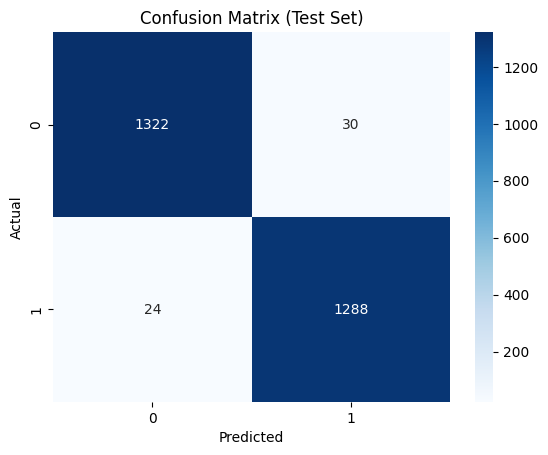

In [13]:
print("Classification Report: ")

print("Training Performance")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

print("Testing Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()